### Aslam Fathin Rahmat
### 19/443568/TK/48764

In [1]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# CIFAR10 Data
train =  datasets.CIFAR10("./data", train=True, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.CIFAR10("/'data'", train=False, download=True,
                         transform=transforms.Compose([transforms.ToTensor()]))
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# MNIST Data
# train =  datasets.MNIST("", train=True, download=True,
#                          transform=transforms.Compose([transforms.ToTensor()]))
# test = datasets.MNIST("", train=False, download=True,
#                          transform=transforms.Compose([transforms.ToTensor()]))

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# jumlah gambar
batch = 20

trainset = torch.utils.data.DataLoader(train, batch_size=batch, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=batch, shuffle=True)

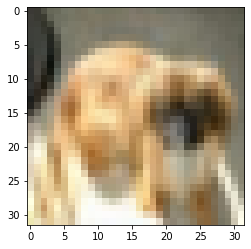

dog
torch.Size([3, 32, 32])


In [4]:
# sample data
img = iter(trainset)
images, labels = next(img)

plt.imshow(images[0].permute(1, 2, 0))
plt.show()
print(classes[labels[0]])
print(images[0].shape)

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(1176, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x)) 
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1176, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=10, bias=True)
)


In [10]:
# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.main = torch.nn.Sequential(
#             torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=(3, 3), padding=1),
#             torch.nn.ReLU(),
#             torch.nn.MaxPool2d(2, 2),
#             torch.nn.Flatten(),
#             torch.nn.Linear(768, 64),
#             torch.nn.Linear(64, 32),
#             torch.nn.Linear(32, 1)     
#         )
        
#     def forward(self, x):
#         out = self.main(x)
#         return out

# net = Net()
# print(net)

# need debugging

In [18]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.005)

In [19]:
iteration = 10
i = 0

for epoch in range(iteration):
    running_loss = 0.0
    for data in trainset:
        X, y = data
        net.zero_grad()
        output = net(X)
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    i += 1
    print(i,' Loss : ', loss.item())
print('Done!!!')

1  Loss :  1.7695996761322021
2  Loss :  1.2556852102279663
3  Loss :  1.376054286956787
4  Loss :  1.6182502508163452
5  Loss :  1.6725552082061768
6  Loss :  1.3880826234817505
7  Loss :  0.7557402849197388
8  Loss :  0.8813605308532715
9  Loss :  1.7241108417510986
10  Loss :  1.141725778579712
Done!!!


In [20]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X)
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
            
print('Accuracy : ', round(correct/total, 3))

Accuracy :  0.625


In [21]:
# import random as rd

# for i in range(batch+1):
#     a = rd.randint(0, batch-1)
#     plt.imshow(X[a].permute(1, 2, 0)  )
#     plt.show()
#     print(classes[y[a]])

In [22]:
# testing 
test_img = iter(testset)
t_images, t_labels = next(test_img)

In [23]:
outputs = net(t_images)

tested image :  20


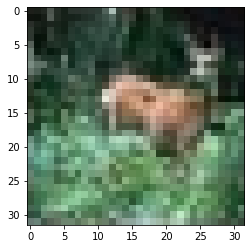

cat


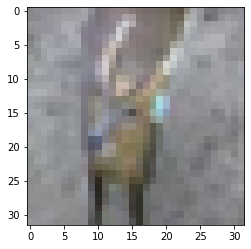

deer


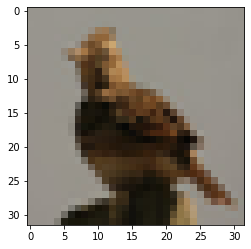

horse


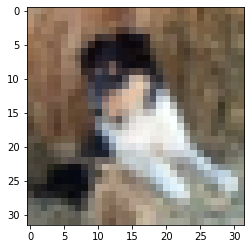

dog


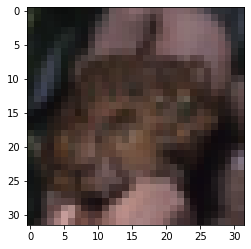

frog


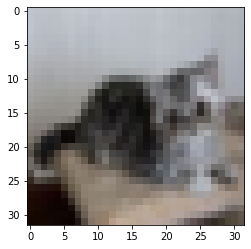

ship


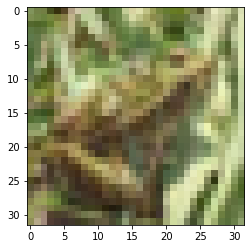

frog


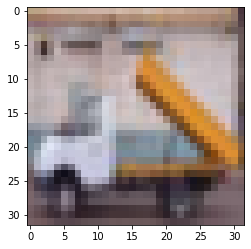

truck


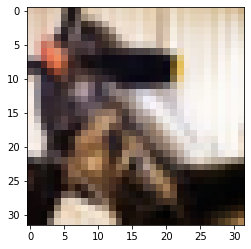

dog


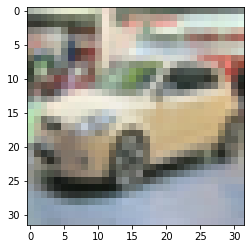

car


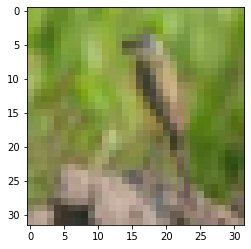

bird


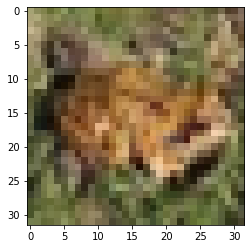

frog


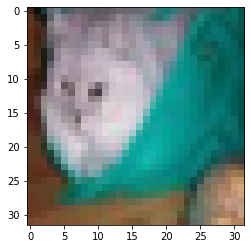

bird


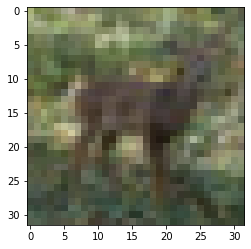

frog


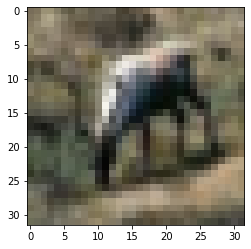

horse


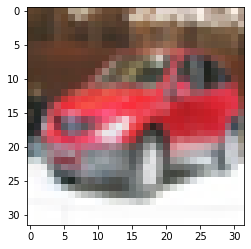

car


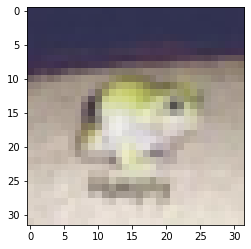

bird


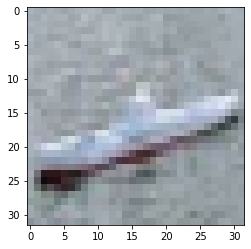

plane


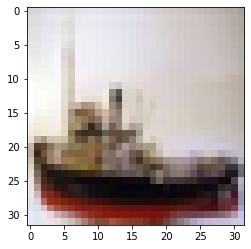

ship


In [24]:
predicted = torch.max(outputs, 1)
# print(predicted.indices)
# print(classes[predicted.indices[0]])
print('tested image : ',batch)
t = 0

for i in range(batch-1):
    t += 1
    plt.imshow(t_images[t].permute(1, 2, 0))
    plt.show()
    print(classes[predicted.indices[t]])